Python tifffile package: https://github.com/cgohlke/tifffile/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf
import geopandas as gpd
from osgeo import gdal

### Using tifffile

In [2]:
lu = plt.imread('ConwyLU.tif')
slope = plt.imread('ConwySlope.tif')
status = plt.imread('ConwyStatus.tif')
print(lu.shape, slope.shape, status.shape)

(207, 150) (234, 159, 4) (188, 136, 4)


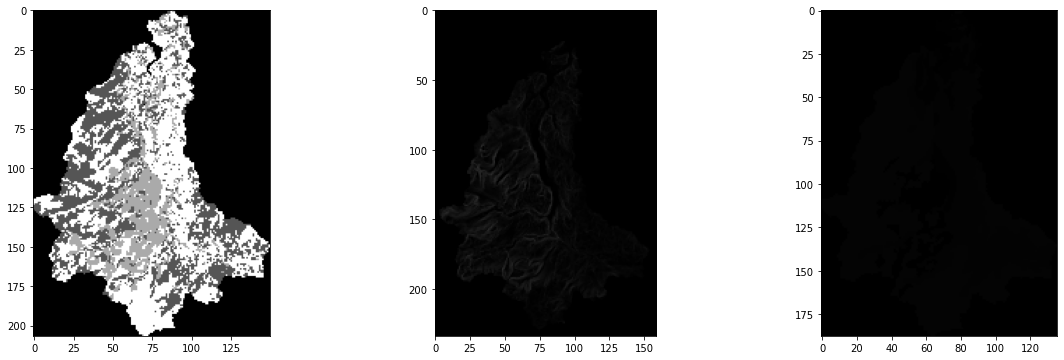

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].imshow(lu, cmap='gray')
axs[1].imshow(slope)
axs[2].imshow(status)

plt.show()

### Using GDAL

In [4]:
lu2 = gdal.Open(r'ConwyLU.tif')
slope2 = gdal.Open(r'ConwySlope.tif')
status2 = gdal.Open(r'ConwyStatus.tif')
files = [lu2, slope2, status2]

In [5]:
print('ConwyLU: # of bands: {}, X: {}, Y: {}'.format(lu2.RasterCount, lu2.RasterXSize, lu2.RasterYSize))
print('ConwySlope: # of bands: {}, X: {}, Y: {}'.format(slope2.RasterCount, slope2.RasterXSize, slope2.RasterYSize))
print('ConwyStatus: # of bands: {}, X: {}, Y: {}'.format(status2.RasterCount, status2.RasterXSize, status2.RasterYSize))

ConwyLU: # of bands: 1, X: 150, Y: 207
ConwySlope: # of bands: 1, X: 159, Y: 234
ConwyStatus: # of bands: 1, X: 136, Y: 188


Statistics: min, max, mean, standard deviation
ConwyLU: [1.0, 3.0, 2.1909979969365, 0.89966755095785]
ConwySlope: [0.0, 43.0, 8.8781044435495, 6.5999558465119]
ConwyStatus: [1.0, 4.0, 3.4168818448936, 0.87562008061435]


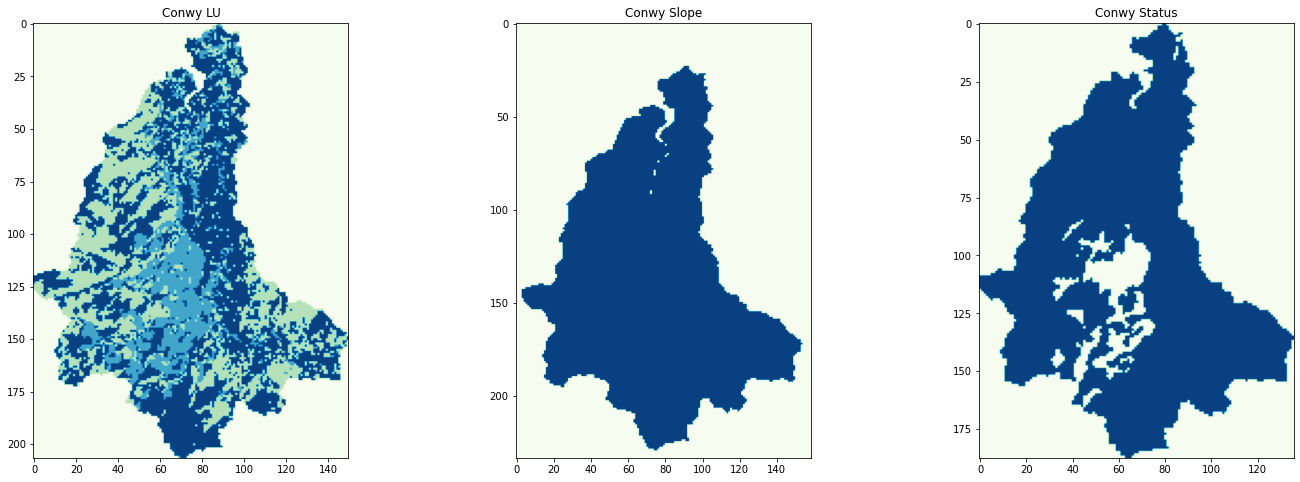

In [58]:
bands = [lu2.GetRasterBand(1), slope2.GetRasterBand(1), status2.GetRasterBand(1)]

print("Statistics: min, max, mean, standard deviation")
print('ConwyLU: {}'.format(bands[0].GetStatistics(True, True)))
print('ConwySlope: {}'.format(bands[1].GetStatistics(True, True)))
print('ConwyStatus: {}'.format(bands[2].GetStatistics(True, True)))

arrs = [band.ReadAsArray() for band in bands]

fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].imshow(arrs[0], cmap='GnBu')
axs[0].set_title('Conwy LU')
axs[1].imshow(arrs[1], cmap='GnBu')
axs[1].set_title('Conwy Slope')
axs[2].imshow(arrs[2], cmap='GnBu')
axs[2].set_title('Conwy Status')

plt.show()

### Using rasterio
https://rasterio.readthedocs.io/en/latest/

In [26]:
import rasterio
import rasterio.features
import rasterio.warp

In [34]:
dataset = rasterio.open('ConwyLU.tif')
mask = dataset.dataset_mask()

In [37]:
for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):
    print(geom)

{'type': 'Polygon', 'coordinates': [[(277850.00000000093, 370000.0), (277850.00000000093, 369800.0), (278050.00000000093, 369800.0), (278050.00000000093, 370000.0), (277850.00000000093, 370000.0)]]}
{'type': 'Polygon', 'coordinates': [[(263850.00000000093, 382000.0), (263850.00000000093, 358000.0), (264250.00000000093, 358000.0), (264250.00000000093, 358200.0), (264850.00000000093, 358200.0), (264850.00000000093, 358400.0), (265650.00000000093, 358400.0), (265650.00000000093, 358600.0), (266050.00000000093, 358600.0), (266050.00000000093, 358400.0), (267050.00000000093, 358400.0), (267050.00000000093, 358600.0), (267250.00000000093, 358600.0), (267250.00000000093, 359000.0), (267450.00000000093, 359000.0), (267450.00000000093, 359600.0), (267250.00000000093, 359600.0), (267250.00000000093, 360000.0), (267450.00000000093, 360000.0), (267450.00000000093, 360600.0), (267650.00000000093, 360600.0), (267650.00000000093, 360800.0), (267850.00000000093, 360800.0), (267850.00000000093, 361200.

### Using geopandas

In [7]:
shp = gpd.read_file('Conwy.shp')
shp

,LU,Status,Slope,geometry
0,1.0,4.0,8.0,"POLYGON ((281250.000 382000.000, 281450.000 38..."
1,2.0,4.0,10.0,"POLYGON ((281450.000 382000.000, 281650.000 38..."
2,2.0,NaN,13.0,"POLYGON ((281670.000 381800.000, 281850.000 38..."
3,1.0,4.0,8.0,"POLYGON ((281230.000 381800.000, 281250.000 38..."
4,1.0,NaN,6.0,"POLYGON ((280850.000 381800.000, 281230.000 38..."
...,...,...,...,...
1624,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1625,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1626,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1627,NaN,4.0,6.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."


In [8]:
shp.describe()

,LU,Status,Slope
count,1255.000000,816.000000,1625.000000
mean,1.834263,3.004902,8.120000
std,0.832708,1.143657,4.826778
min,1.000000,1.000000,0.000000
25%,1.000000,3.000000,5.000000
50%,2.000000,3.000000,7.000000
75%,3.000000,4.000000,10.000000
max,3.000000,4.000000,37.000000


In [9]:
print(shp['LU'].value_counts(dropna=False))
print(shp['Status'].value_counts(dropna=False))
slopes = shp['Slope'].value_counts()

1.0    556
NaN    374
2.0    351
3.0    348
Name: LU, dtype: int64
NaN    813
4.0    358
3.0    281
1.0    177
Name: Status, dtype: int64


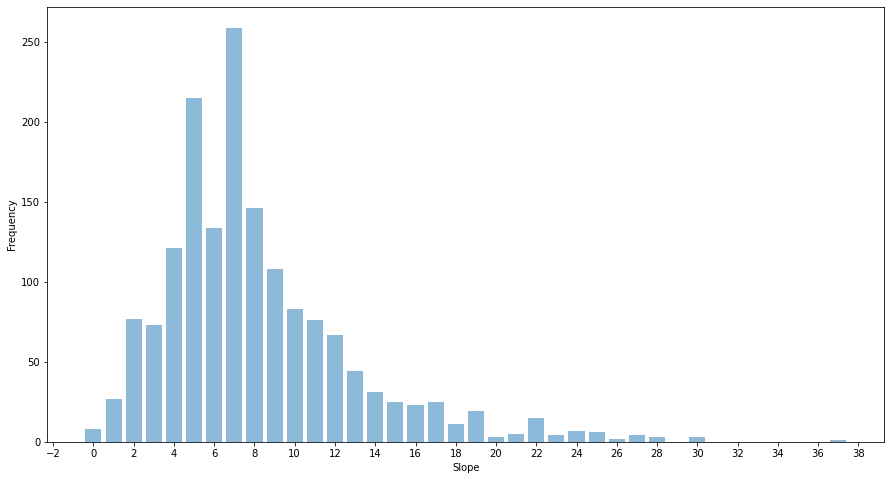

In [10]:
slopes.sort_index(inplace=True)

fig = plt.figure(figsize=(15, 8))
num_ticks = len(slopes)
plt.locator_params(axis="x", nbins=num_ticks)
# plt.plot(slopes)
plt.bar(slopes.index, slopes.values, alpha=0.5)
    
plt.xlabel("Slope")
plt.ylabel("Frequency")

plt.show()

In [59]:
slopes

0.0       8
1.0      27
2.0      77
3.0      73
4.0     121
5.0     215
6.0     134
7.0     259
8.0     146
9.0     108
10.0     83
11.0     76
12.0     67
13.0     44
14.0     31
15.0     25
16.0     23
17.0     25
18.0     11
19.0     19
20.0      3
21.0      5
22.0     15
23.0      4
24.0      7
25.0      6
26.0      2
27.0      4
28.0      3
30.0      3
37.0      1
Name: Slope, dtype: int64

In [11]:
shp.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°45'N to 61°N, 9°W to 2°E
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

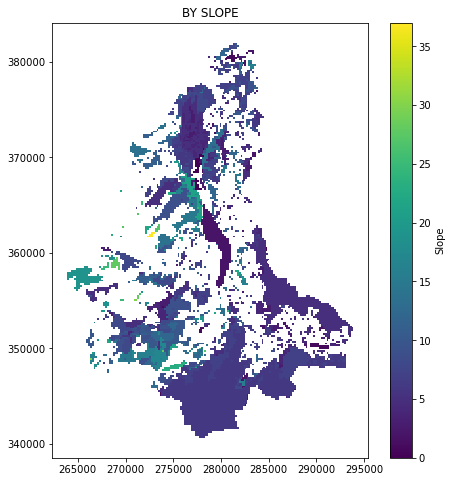

In [12]:
# fig, axs = plt.subplots(1, 3, figsize=(20, 8))
f, ax = plt.subplots(1, figsize=(8, 8))
ax = shp.plot(ax=ax, column='Slope', legend=True, legend_kwds={'label': "Slope"})
plt.title("BY SLOPE")
plt.show()

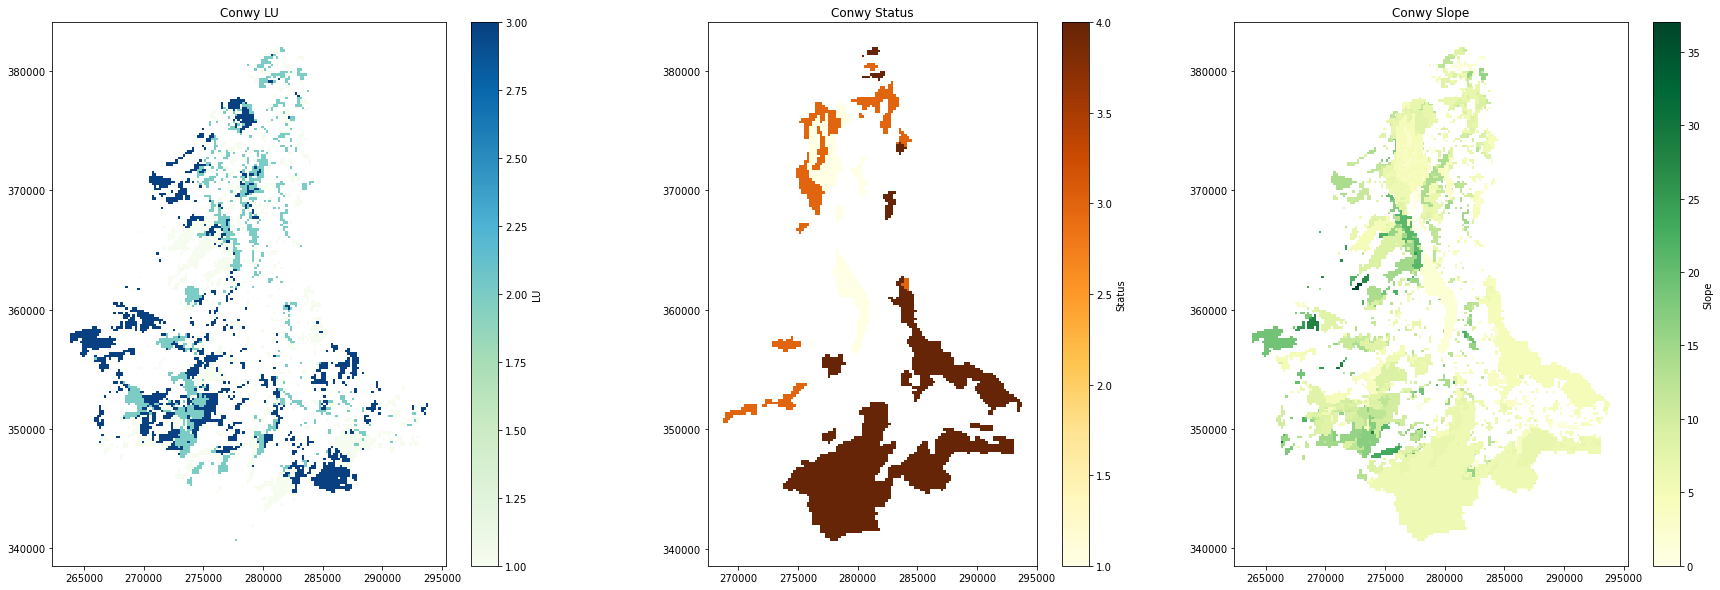

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(30, 10))
shp.plot(ax=ax1, column='LU', cmap='GnBu', legend=True, legend_kwds={'label': "LU"})
ax1.set_title('Conwy LU')
shp.plot(ax=ax2, column='Status', cmap='YlOrBr', legend=True, legend_kwds={'label': "Status"})
ax2.set_title('Conwy Status')
shp.plot(ax=ax3, column='Slope', cmap='YlGn', legend=True, legend_kwds={'label': "Slope"})
ax3.set_title('Conwy Slope')

plt.show()

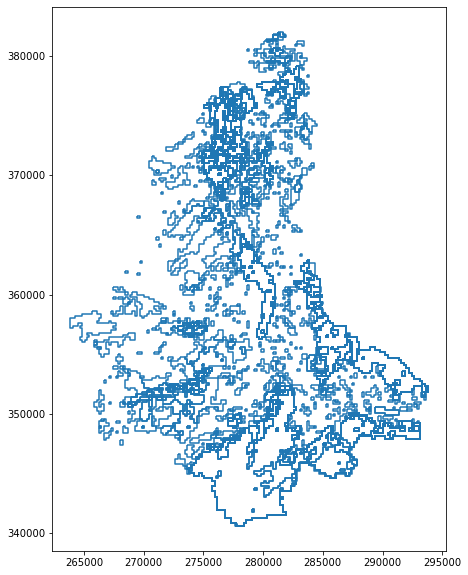

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 10))
shp.boundary.plot(ax=ax)

plt.show()

In [15]:
shx = gpd.read_file('Conwy.shx')

In [16]:
shx

,LU,Status,Slope,geometry
0,1.0,4.0,8.0,"POLYGON ((281250.000 382000.000, 281450.000 38..."
1,2.0,4.0,10.0,"POLYGON ((281450.000 382000.000, 281650.000 38..."
2,2.0,NaN,13.0,"POLYGON ((281670.000 381800.000, 281850.000 38..."
3,1.0,4.0,8.0,"POLYGON ((281230.000 381800.000, 281250.000 38..."
4,1.0,NaN,6.0,"POLYGON ((280850.000 381800.000, 281230.000 38..."
...,...,...,...,...
1624,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1625,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1626,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1627,NaN,4.0,6.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."


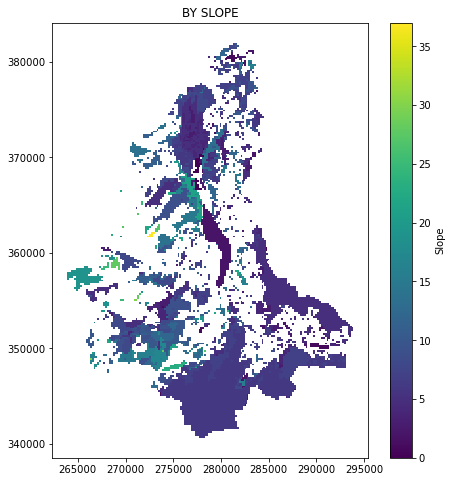

In [17]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = shx.plot(ax=ax, column='Slope', legend=True, legend_kwds={'label': "Slope"})
plt.title("BY SLOPE")
plt.show()

In [18]:
dbf = gpd.read_file('Conwy.dbf')
dbf

,LU,Status,Slope,geometry
0,1.0,4.0,8.0,"POLYGON ((281250.000 382000.000, 281450.000 38..."
1,2.0,4.0,10.0,"POLYGON ((281450.000 382000.000, 281650.000 38..."
2,2.0,NaN,13.0,"POLYGON ((281670.000 381800.000, 281850.000 38..."
3,1.0,4.0,8.0,"POLYGON ((281230.000 381800.000, 281250.000 38..."
4,1.0,NaN,6.0,"POLYGON ((280850.000 381800.000, 281230.000 38..."
...,...,...,...,...
1624,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1625,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1626,NaN,4.0,7.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."
1627,NaN,4.0,6.0,"MULTIPOLYGON (((281850.000 352300.000, 282250...."


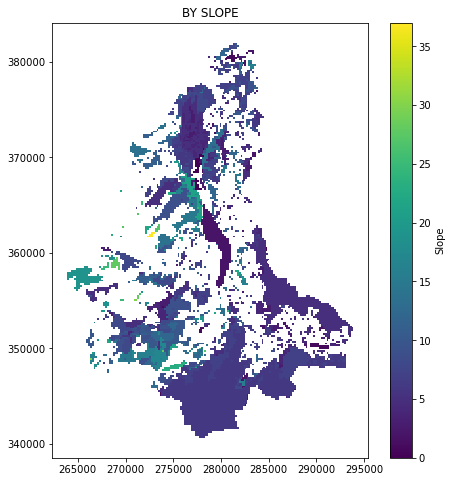

In [19]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = dbf.plot(ax=ax, column='Slope', legend=True, legend_kwds={'label': "Slope"})
plt.title("BY SLOPE")
plt.show()

In [20]:
# pip install pyshp
import shapefile
import osr
from io import StringIO

In [21]:
dbf_new = open("Conwy.dbf", "rb")
shp_new = open("Conwy.shp", "rb")
shx_new = open("Conwy.shx", "rb")

# prj_new = open("Conwy.prj", "rb")
# prj_new = shapefile.Reader("Conwy.prj")
prj_new = StringIO("Conwy.prj")

In [22]:
r = shapefile.Reader(shp=shp_new, shx=shx_new, dbf=dbf_new)
r.numRecords

1629

In [23]:
prj_tmp = 'PROJCS["OSGB_1936_British_National_Grid",GEOGCS["GCS_OSGB 1936",DATUM["D_OSGB_1936",SPHEROID["Airy_1830",6377563.396,299.3249646]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["Meter",1]]'

In [24]:
prj4 = osr.SpatialReference(prj_tmp).ExportToProj4()
prj4

'+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +units=m +no_defs'

### After a while I think only the <code>.shp</code> file is needed